In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from myScripts import featureengineering
feature_df = featureengineering.create_features('Analysis_dataset.csv')

In [2]:
feature_df.head()

,,,,,,,ratio_fraud_device_id,num_trans_device_id,ratio_fraud_country,num_trans_country,ratio_fraud_sex,num_trans_sex,ratio_fraud_age,num_trans_age,ratio_fraud_browser,num_trans_browser,ratio_fraud_source,num_trans_source,purchase_value,class,time_latency
user_id,device_id,country,sex,age,browser,source,,,,,,,,,,,,,,,
285108,HZAKVUFTDOSFD,United States,M,49,Chrome,Direct,0.0,2.0,0.096830,46184.0,0.095442,70126,0.056534,1079.0,0.099441,48652,0.105643,24242,31,0,1377.683333
369076,HZAKVUFTDOSFD,Canada,M,43,Safari,Ads,0.0,2.0,0.115188,2344.0,0.095442,70126,0.084140,2686.0,0.091743,19620,0.091696,47461,40,0,1372.683333
131009,XGQAJSOUJIZCC,United Kingdom,F,21,IE,SEO,0.0,1.0,0.103911,3580.0,0.091671,49874,0.079291,2989.0,0.086107,29138,0.090109,48297,31,0,1888.400000
328855,VCCTAYDCWKZIY,United States,M,26,IE,Direct,0.0,1.0,0.096830,46184.0,0.095442,70126,0.076906,4460.0,0.086107,29138,0.105643,24242,16,0,611.483333
229053,MFFIHYNXCJLEY,Korea Republic of,M,34,Chrome,SEO,0.0,1.0,0.091589,3341.0,0.095442,70126,0.088694,5006.0,0.099441,48652,0.090109,48297,29,0,44.883333


In [3]:
%matplotlib inline
import os
if os.path.exists("myScripts/apply_classifier_model.py"):
    os.remove("myScripts/apply_classifier_model.py")

In [4]:
%%writefile myScripts/apply_classifier_model.py

import itertools
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

from matplotlib import pyplot as plt

def apply_train_test_split(feature_df, test_size):
    '''
    Args: 
        feature_df dataframe to be used for classification
        testsize float value in the range (0, 1), proportion of test dataset
        
    Output:
        splits feature_df into training and testing features and target variables
        (X_train, X_test, y_train, y_test)
    '''
    return train_test_split(feature_df.drop('class', axis = 1), 
                            feature_df['class'], test_size=test_size)

def apply_RF_classifier(X_train, y_train, model_path):
    '''
    Args: 
        X_train dataframe with all the features to be used for training
        y_train series containing labels for each row of X_train
        model_path path where trained random forest model is to be saved
        
    Output:
        trained random forest model
    '''

    RF_model = RandomForestClassifier(n_estimators=50, random_state=0, n_jobs=-1)    
    # Fit the training data
    RF_model.fit(X_train, y_train)
    
    pickle_models(RF_model, model_path)
    
    return RF_model

def apply_balanced_RF_classifier(X_train, y_train, model_path):
    '''
    Args: 
        X_train dataframe with all the features to be used for training
        y_train series containing labels for each row of X_train
        model_path path where trained balanced random forest model is to be saved
        
    Output:
        trained balanced random forest model
    '''
    BRF_model = BalancedRandomForestClassifier(n_estimators=50, random_state=0, n_jobs=-1)    
    # Fit the training data
    BRF_model.fit(X_train, y_train)
    
    pickle_models(BRF_model, model_path)
    
    return BRF_model

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
### Calculate performance in dollar value
def calculate_loss(row):
    '''
    Args: 
        row of data containing actual and predicted labels and purchase value for each transaction
        
    Output:
        loss value for each prediction
    '''
    if (row['actual'] == 0) & (row['predicted']==1):
        row['loss'] = 8.0
    elif (row['actual'] == 1) & (row['predicted']==0):
        row['loss'] = row['purchase_value']
    else:
        row['loss'] = 0
    
    return row

def calculate_total_loss(X_test, y_test, y_pred):
    '''
    Args: 
        X_test test datset
        y_test test labels
        y_pred predicted labels
        
    Output:
        total_loss for the entire dataset
    '''
    loss_df = X_test
    loss_df['actual'] = y_test
    loss_df['predicted'] = y_pred
    loss_df = loss_df.apply(calculate_loss, axis = 1)
    total_loss = loss_df.loss.sum()
    return total_loss

def pickle_models(model, filename):
    '''pickles saved models in the specified path'''
    joblib.dump(model, filename)

def load_models(filename):
    '''loads trained model specified path'''
    return joblib.load(filename)

Writing myScripts/apply_classifier_model.py


In [5]:
from myScripts.apply_classifier_model import apply_train_test_split
X_train, X_test, y_train, y_test = apply_train_test_split(feature_df, test_size = 0.2)

Normalized confusion matrix
[[0.995543 0.004457]
 [0.064343 0.935657]]


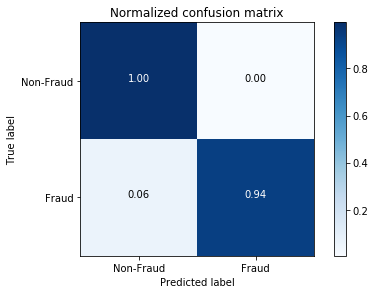

In [6]:
from myScripts.apply_classifier_model import apply_RF_classifier
from myScripts.apply_classifier_model import plot_confusion_matrix
from myScripts.apply_classifier_model import calculate_total_loss
from myScripts.apply_classifier_model import load_models
from sklearn.metrics import confusion_matrix

## Create and save models
RF_model = apply_RF_classifier(X_train, y_train, 'RF_model.joblib')

# Predict the values using the Decision Tree Classifier
# Load from the pickled file
RF_model = load_models('RF_model.joblib')
RF_y_predicted = RF_model.predict(X_test)

## Predict probablities of Decision Tree Classifier
RF_y_pred_prob = RF_model.predict_proba(X_test)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, RF_y_predicted)
np.set_printoptions(precision=6)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Non-Fraud', 'Fraud'], normalize=True,
                      title='Normalized confusion matrix')

Normalized confusion matrix
[[0.985709 0.014291]
 [0.       1.      ]]


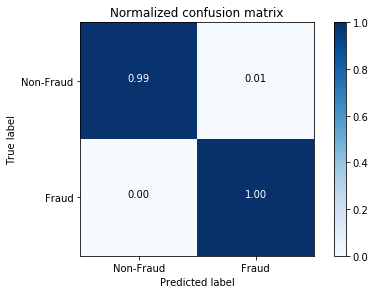

In [7]:
from myScripts.apply_classifier_model import apply_balanced_RF_classifier

## Create and save models
BRF_model = apply_balanced_RF_classifier(X_train, y_train, 'BRF_model.joblib')

# Predict the values using the Decision Tree Classifier
# Load from the pickled file
BRF_model = load_models('BRF_model.joblib')
BRF_y_predicted = BRF_model.predict(X_test)

# Predict the values using the Decision Tree Classifier
BRF_y_predicted = BRF_model.predict(X_test)

## Predict probablities of Decision Tree Classifier
BRF_y_pred_prob = BRF_model.predict_proba(X_test)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, BRF_y_predicted)
np.set_printoptions(precision=6)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Non-Fraud', 'Fraud'], normalize=True,
                      title='Normalized confusion matrix')

In [8]:
# Calculate total loss in dollars using DT classifier
print('Total loss in dollar amounts using RF classifier = ', calculate_total_loss(X_test, y_test, RF_y_predicted))

# Calculate total loss in dollars using RF classifier
print('Total loss in dollar amounts using balanced RF classifier = ', calculate_total_loss(X_test, y_test, BRF_y_predicted))

Total loss in dollar amounts using RF classifier =  5748.0
Total loss in dollar amounts using balanced RF classifier =  2488.0
